In [1]:
import trackintel as ti
pfs = ti.io.file.read_positionfixes_csv('pfs.csv', index_col='ID')
sp = ti.io.file.read_staypoints_csv('staypoints.csv', index_col='id')
tpls = ti.io.file.read_triplegs_csv('triplegs.csv', index_col='id')

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/trackintel/io/file.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/

In [2]:
# Generate locations from the staypoints.
new_sp, locs = ti.preprocessing.staypoints.generate_locations(staypoints=sp, method='dbscan', epsilon=100, num_samples=3, agg_level='user')

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


In [3]:
new_sp

,user_id,started_at,finished_at,geom,location_id
id,,,,,
0,0,2022-09-20 14:10:57-04:00,2022-09-20 14:13:46-04:00,POINT (-81.75290 30.27120),0
1,0,2022-09-20 23:40:41-04:00,2022-09-20 23:47:54-04:00,POINT (-81.75290 30.27120),0
2,0,2022-09-21 01:33:56-04:00,2022-09-21 01:36:24-04:00,POINT (-81.82170 30.28510),1
3,0,2022-09-21 01:37:04-04:00,2022-09-21 01:39:10-04:00,POINT (-81.67558 30.36497),<NA>
4,0,2022-09-21 02:03:54-04:00,2022-09-21 02:08:44-04:00,POINT (-81.67558 30.36497),<NA>
...,...,...,...,...,...
350992,5171,2022-10-28 14:16:55-04:00,2022-10-28 14:31:46-04:00,POINT (-81.74885 30.20228),20503
350993,5171,2022-10-28 20:15:35-04:00,2022-10-28 20:30:30-04:00,POINT (-81.74548 30.20197),<NA>
350994,5171,2022-10-28 20:30:30-04:00,2022-10-28 20:36:12-04:00,POINT (-81.74800 30.20161),20503


In [4]:
locs

,user_id,center,extent
id,,,
0,0,POINT (-81.75290 30.27120),"POLYGON ((-81.75186 30.27120, -81.75186 30.271..."
1,0,POINT (-81.82170 30.28510),"POLYGON ((-81.82066 30.28510, -81.82066 30.285..."
2,0,POINT (-81.60281 30.19179),"POLYGON ((-81.60282 30.19178, -81.60281 30.191..."
3,0,POINT (-81.66240 30.45000),"POLYGON ((-81.66136 30.45000, -81.66136 30.449..."
4,0,POINT (-81.58669 30.35241),"POLYGON ((-81.58670 30.35240, -81.58669 30.352..."
...,...,...,...
20499,5166,POINT (-81.78566 30.30384),"POLYGON ((-81.78566 30.30383, -81.78566 30.303..."
20500,5167,POINT (-81.50920 30.29030),"POLYGON ((-81.50816 30.29030, -81.50816 30.290..."
20501,5167,POINT (-81.68930 30.39580),"POLYGON ((-81.68944 30.39683, -81.68934 30.396..."


In [5]:
# Write locations to csv file.
locs.as_locations.to_csv('location.csv')

In [6]:
pfs

,Unnamed: 0,id,tracked_at,user_id,staypoint_id,tripleg_id,geom
ID,,,,,,,
0,0,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:01-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
1,1,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:02-04:00,0,NaN,0.0,POINT (-81.72430 30.31220)
2,2,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:32-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
3,3,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:33-04:00,0,NaN,0.0,POINT (-81.72430 30.31220)
4,4,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:29:06-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
...,...,...,...,...,...,...,...
5837295,5587016,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-29 17:36:49-04:00,5171,NaN,535423.0,POINT (-81.97047 30.29001)
5837228,5586949,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-30 00:19:09-04:00,5171,NaN,535424.0,POINT (-81.73973 30.20432)
5837229,5586950,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-30 00:19:59-04:00,5171,NaN,535424.0,POINT (-81.73973 30.20431)


In [7]:
# id_counts = pfs['user_id'].value_counts()

# # Limit the count between 20000 and 30000
# id_counts_filtered = id_counts[(id_counts >= 20000) & (id_counts <= 30000)]


In [8]:
# Find the user_id with the most occurrences and Visualization.
top_id = pfs['user_id'].value_counts().idxmax()
pfs_top = pfs.loc[pfs['user_id'] == top_id]
sp_top = new_sp.loc[new_sp['user_id'] == top_id]
locs_top = locs.loc[locs['user_id'] == top_id]

In [9]:
pfs_top

,Unnamed: 0,id,tracked_at,user_id,staypoint_id,tripleg_id,geom
ID,,,,,,,
716625,688156,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:05:40-04:00,1716,146403.0,NaN,POINT (-81.77254 30.32351)
716626,688157,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:16:03-04:00,1716,NaN,NaN,POINT (-81.81001 30.36001)
716627,688158,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:49:34-04:00,1716,NaN,213319.0,POINT (-81.81369 30.35877)
716628,688159,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:49:43-04:00,1716,NaN,213319.0,POINT (-81.81369 30.35878)
716629,688160,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:51:13-04:00,1716,NaN,213319.0,POINT (-81.81341 30.35836)
...,...,...,...,...,...,...,...
5366973,5142455,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:41:45-04:00,1716,NaN,215580.0,POINT (-81.81354 30.35846)
5366974,5142456,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:46:10-04:00,1716,NaN,215580.0,POINT (-81.81344 30.35846)
5366975,5142457,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:46:25-04:00,1716,NaN,215580.0,POINT (-81.81343 30.35845)


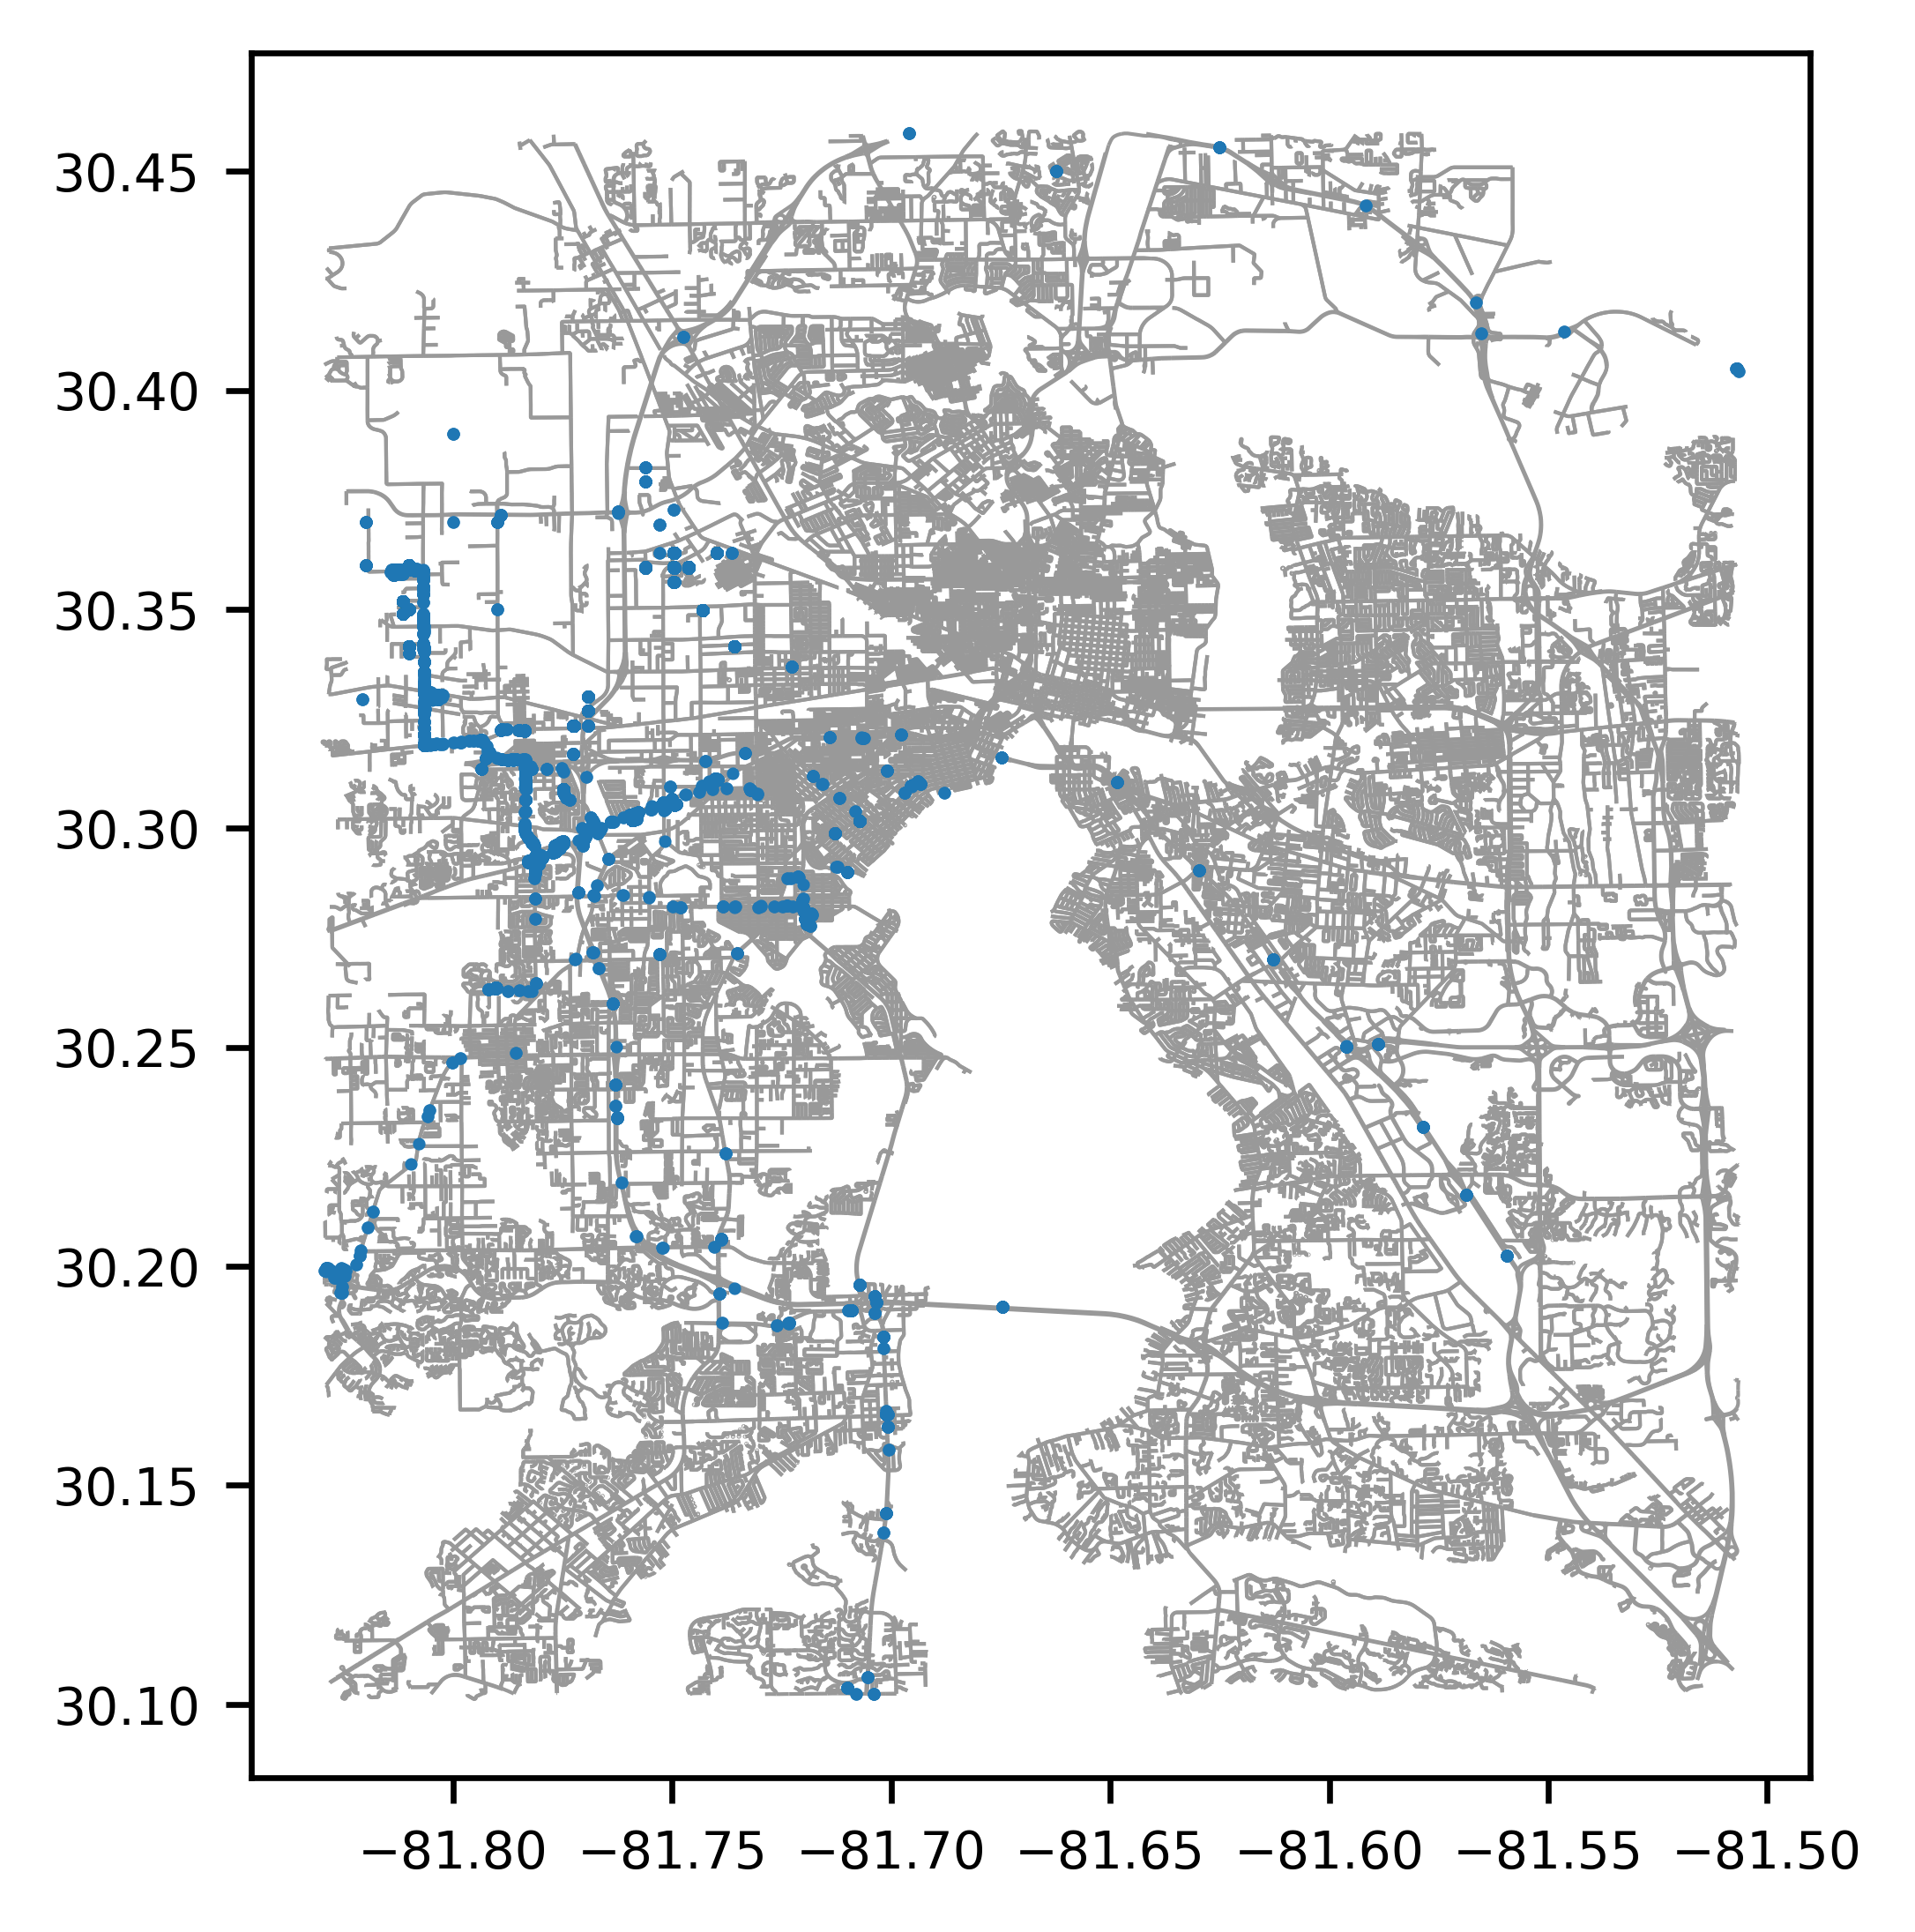

In [10]:
# Plots positionfixes
pfs_top.as_positionfixes.plot(plot_osm=True)

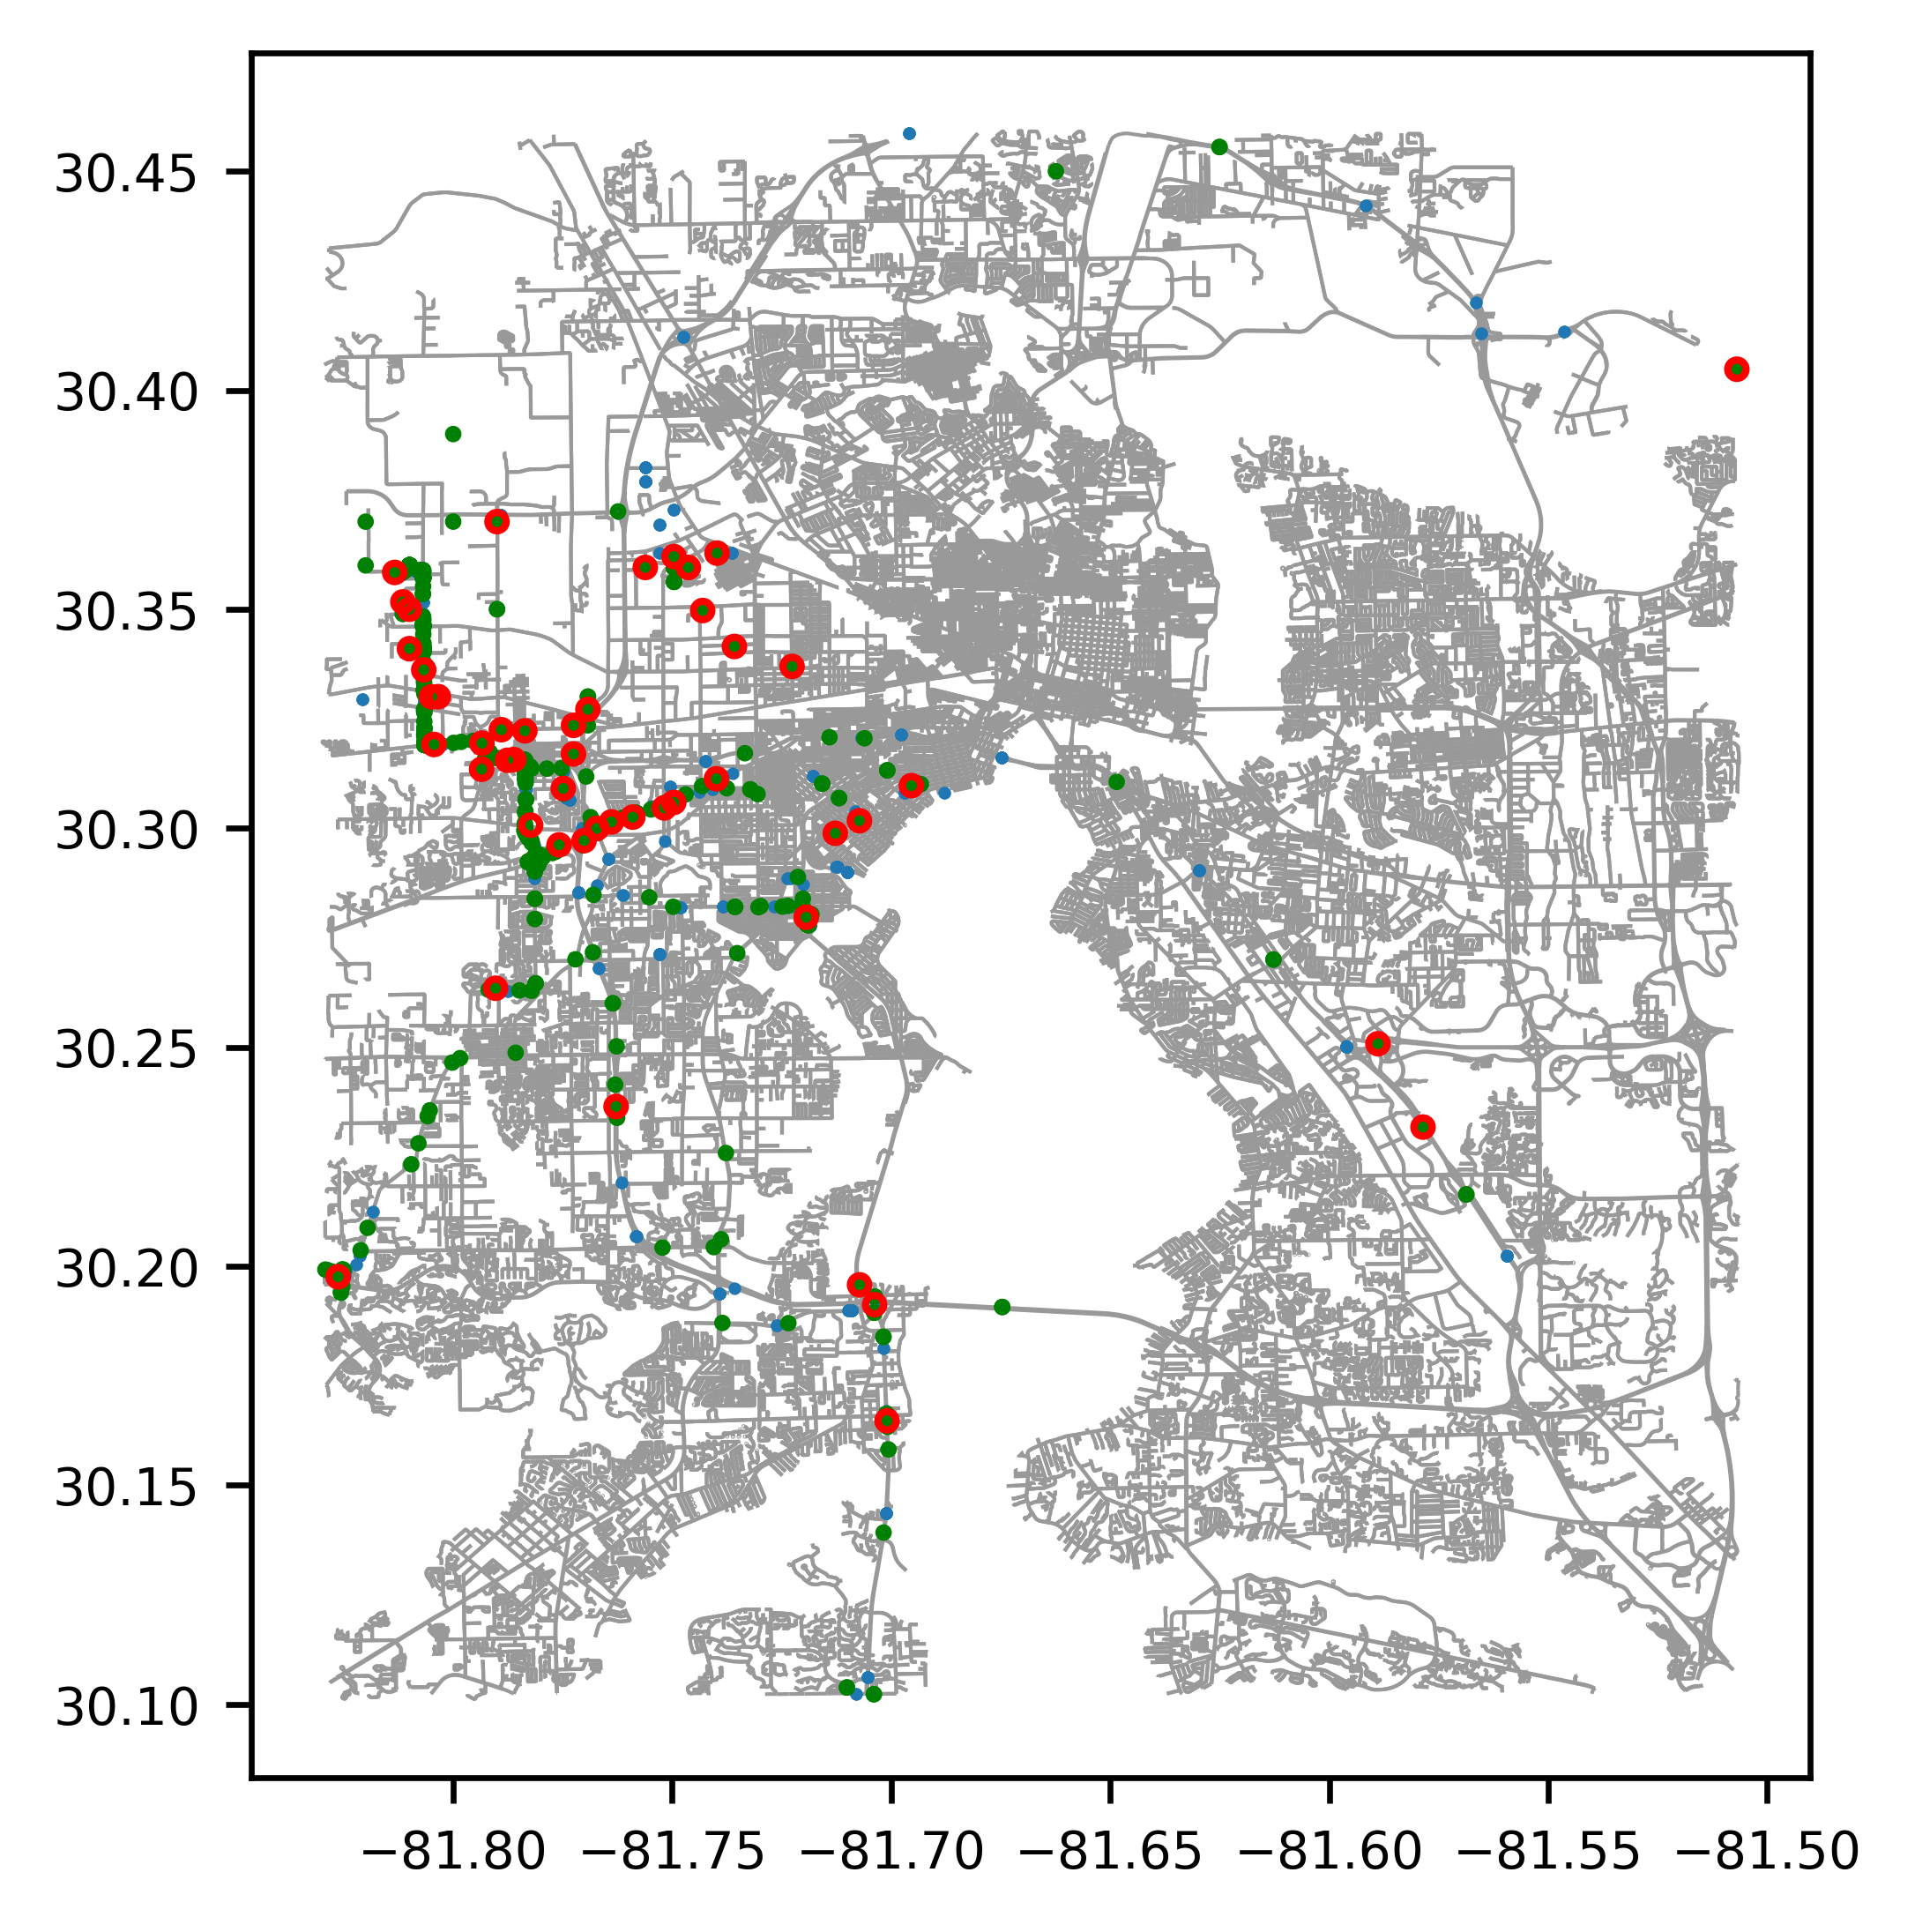

In [11]:
locs_top.as_locations.plot(radius=200, positionfixes=pfs_top, staypoints=sp_top, plot_osm=True)